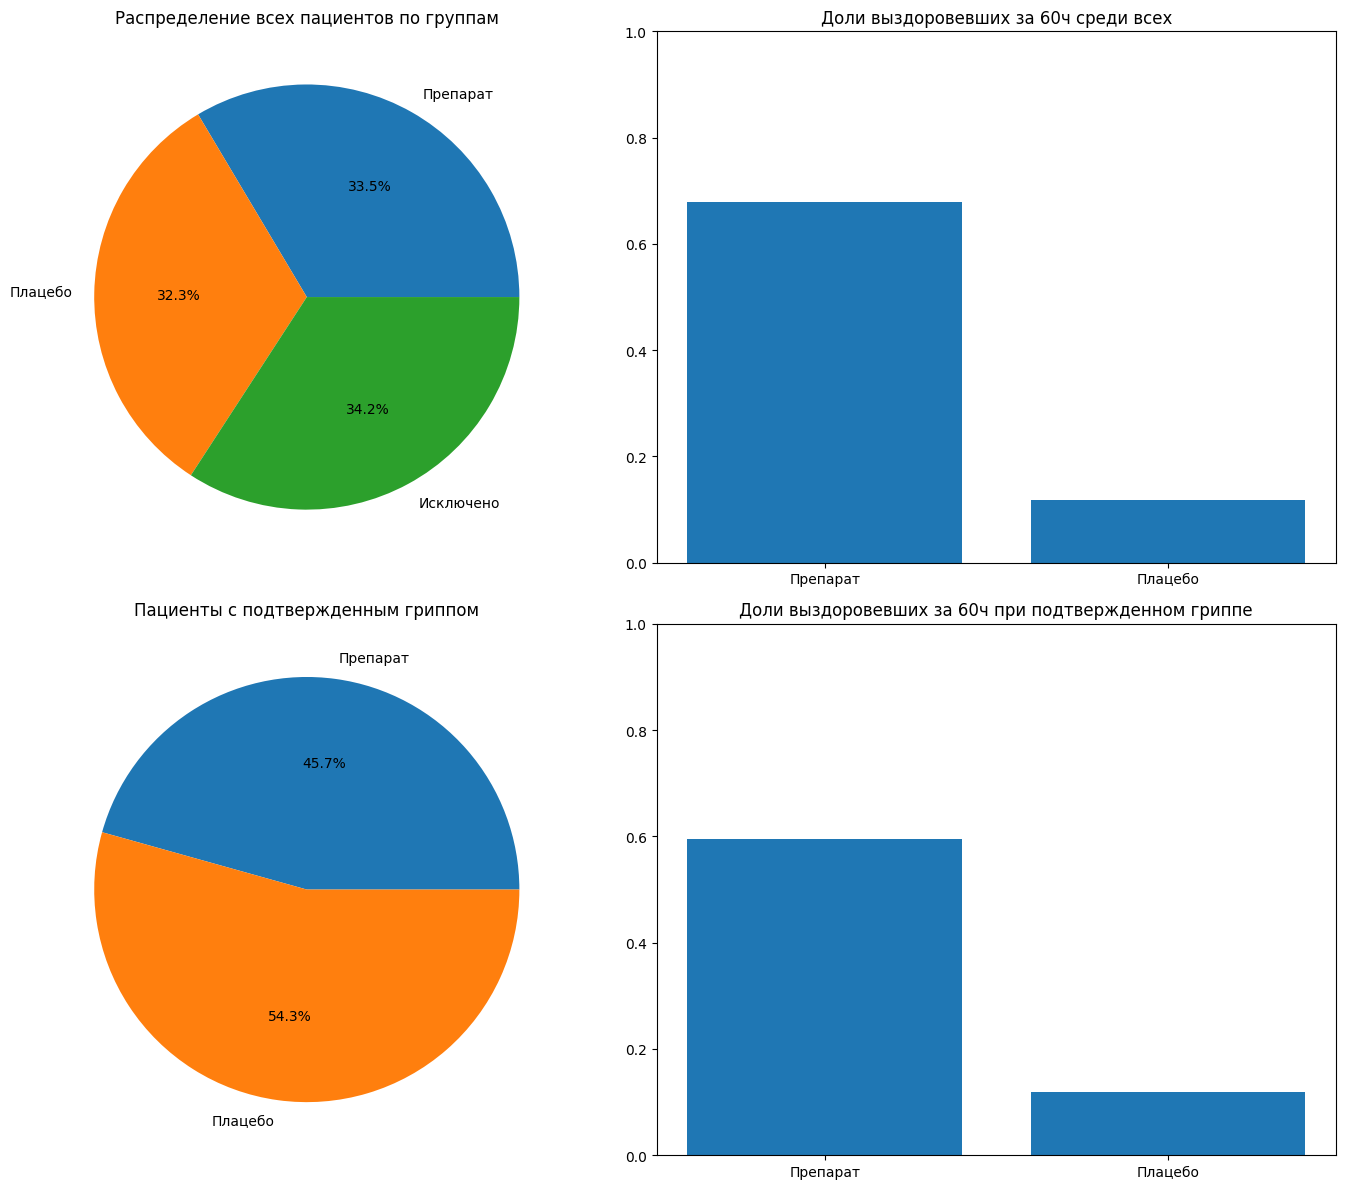

p-значение (точный тест Фишера): 0.000


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import fisher_exact

# Общие данные
total_patients = 158
analyzed_drug = 53
analyzed_placebo = 51 
recovered_drug_60h = 36
recovered_placebo_60h = 6

# Подгруппа с подтвержденным гриппом
analyzed_drug_confirmed = 42
analyzed_placebo_confirmed = 50
recovered_drug_60h_confirmed = 25
recovered_placebo_60h_confirmed = 6

# Доли выздоровевших за 60ч
share_recovered_drug_60h = recovered_drug_60h / analyzed_drug
share_recovered_placebo_60h = recovered_placebo_60h / analyzed_placebo
share_recovered_drug_60h_confirmed = recovered_drug_60h_confirmed / analyzed_drug_confirmed
share_recovered_placebo_60h_confirmed = recovered_placebo_60h_confirmed / analyzed_placebo_confirmed

# Визуализация данных
fig, ax = plt.subplots(2, 2, figsize=(14, 12))

labels = ['Препарат', 'Плацебо', 'Исключено'] 
sizes = [analyzed_drug, analyzed_placebo, total_patients - analyzed_drug - analyzed_placebo]
ax[0, 0].pie(sizes, labels=labels, autopct='%1.1f%%')
ax[0, 0].set_title("Распределение всех пациентов по группам")

ax[0, 1].bar(['Препарат', 'Плацебо'], [share_recovered_drug_60h, share_recovered_placebo_60h])
ax[0, 1].set_ylim(0, 1)
ax[0, 1].set_title("Доли выздоровевших за 60ч среди всех")

sizes_confirmed = [analyzed_drug_confirmed, analyzed_placebo_confirmed]
ax[1, 0].pie(sizes_confirmed, labels=['Препарат', 'Плацебо'], autopct='%1.1f%%')
ax[1, 0].set_title("Пациенты с подтвержденным гриппом")

ax[1, 1].bar(['Препарат', 'Плацебо'], [share_recovered_drug_60h_confirmed, share_recovered_placebo_60h_confirmed])
ax[1, 1].set_ylim(0, 1)
ax[1, 1].set_title("Доли выздоровевших за 60ч при подтвержденном гриппе")

plt.tight_layout()
plt.show()

# Статистический анализ в подгруппе с гриппом
contingency_table = [
    [recovered_drug_60h_confirmed, analyzed_drug_confirmed - recovered_drug_60h_confirmed],
    [recovered_placebo_60h_confirmed, analyzed_placebo_confirmed - recovered_placebo_60h_confirmed]
]

_, p_value = fisher_exact(contingency_table)

print(f"p-значение (точный тест Фишера): {p_value:.3f}")

# PRESENTATION
https://docs.google.com/presentation/d/1ULZpVWfzc1MQH3PHPYKMpqAmdJ7-fhODdflOc5Ilwes/edit?usp=drive_link